# Customer Churn Prediction
## Introduction 
In today's highly competitive telecommunications industry, retaining customers is critical to long-term growth and profitability. Understanding customer churn, or the phenomena in which customers abandon services, is critical for telco firms. The Telco Customer attrition dataset provides a comprehensive set of customer-related data targeted at predicting attrition over a specified timeframe. This dataset allows us to investigate numerous client qualities and interactions with services to design customer retention tactics.

## Research Questions
1.	What factors contribute most to customer churn?
    -	Identify which specific services or customer attributes have the highest correlation with churn.
2.	Are there any patterns in customer demographics that are associated with higher churn rates?
    -	Explore if gender, age range, or the presence of partners and dependents impact churn.
3.	How does contract type influence customer retention?
    -	Examine if customers on different contract types (month-to-month, one year, two years) exhibit varying churn rates.
4.	Does the payment method affect customer loyalty?
    -	Investigate whether customers using specific payment methods are more or less likely to churn.

## Data Mining Problem and Objectives
### Problem 
- The data mining task at hand is to create a prediction model that can identify customers who are likely to churn.

### Objectives
- The primary objective of using previous customer data is to predict which customers are likely to terminate their services shortly. This predictive capacity enables telcos to proactively intervene with targeted retention campaigns, reducing churn and sustaining revenue streams.

## Problem Formulation
Given the Telco Customer Churn dataset, the problem can be reduced to a binary classification task: predict whether or not a customer will churn within a given timeframe. Each instance in the dataset represents a distinct client, and the goal variable, "Churn," shows whether the customer left within the previous month (1 for churn, 0 for kept). The goal is to create a classification model that can accurately forecast the possibility of churn based on customer qualities, service subscriptions, and demographic data.

Using supervised learning approaches such as logistic regression, decision trees, random forests, or gradient boosting, we hope to build a model that can generalize well to new data and successfully distinguish between churned and kept clients. Feature engineering, model selection, and hyperparameter tuning will be essential elements in the predictive modeling process to maximize performance metrics such as accuracy, precision, recall, and F1 score.

## Approach 
- **Input Features:** Services signed up for (phone, multiple lines, internet, etc.) Customer account information (tenure, contract type, payment method, etc.), Demographic information (gender, age range, partners, dependents)
- **Output:** Churn column indicating whether the customer churned (1) or not (0)
- **Data Preprocessing:** Handle missing values, encode categorical variables, and scale numerical features as necessary.
- **Split** the dataset into training and testing sets.
- **Model Selection:** Choose appropriate classification algorithms (e.g., logistic regression, decision trees, random forests, or gradient boosting) for prediction.
- **Model Evaluation:** Evaluate the model's performance using metrics such as accuracy, precision, recall, and F1-score on the test set.

# Implementation

In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy import stats
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from collections import Counter
from imblearn.combine import SMOTEENN
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import r2_score, roc_curve, auc, make_scorer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import pickle
from sklearn.decomposition import PCA
import warnings

%matplotlib inline
mpl.style.use('ggplot')
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

C:\Users\hp\AppData\Roaming\Python\Python39\site-packages\scipy\__init__.py:177: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## 1. Data Wrangling 

In [2]:
# load the customer dataset
customer_data = pd.read_csv('Data/Telco-Customer-Churn.csv')
print(customer_data.shape)
customer_data.head()

(7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
# information of data
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
# check the null counts
customer_data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

- The output above indicates that there are **no missing values** in the Customer dataset, which is a positive sign for data integrity. However, it's noted that there is an inconsistency in the data type of the **"TotalCharges"** feature. While the feature should ideally be of float data type, it's incorrectly classified as an Object in the dataset. This discrepancy will be addressed during the Data Preprocessing phase.

In [5]:
# Investigate all the elements within each Feature 
for column in customer_data:
    unique_vals = np.unique(customer_data[column])
    nr_values = len(unique_vals)
    if nr_values < 20:
        print('The number of values for feature {} :{} -- {}'.format(column, nr_values,unique_vals))
    else:
        print('The number of values for feature {} :{}'.format(column, nr_values))

The number of values for feature customerID :7043
The number of values for feature gender :2 -- ['Female' 'Male']
The number of values for feature SeniorCitizen :2 -- [0 1]
The number of values for feature Partner :2 -- ['No' 'Yes']
The number of values for feature Dependents :2 -- ['No' 'Yes']
The number of values for feature tenure :73
The number of values for feature PhoneService :2 -- ['No' 'Yes']
The number of values for feature MultipleLines :3 -- ['No' 'No phone service' 'Yes']
The number of values for feature InternetService :3 -- ['DSL' 'Fiber optic' 'No']
The number of values for feature OnlineSecurity :3 -- ['No' 'No internet service' 'Yes']
The number of values for feature OnlineBackup :3 -- ['No' 'No internet service' 'Yes']
The number of values for feature DeviceProtection :3 -- ['No' 'No internet service' 'Yes']
The number of values for feature TechSupport :3 -- ['No' 'No internet service' 'Yes']
The number of values for feature StreamingTV :3 -- ['No' 'No internet servi

- The **'Customer ID'** feature has unique value counts equivalent to the total number of records, indicating its distinctiveness for each customer.
- The **‘Senior Citizen’** feature has binary values so, should change those values into ‘Yes’ or ‘No’ for analysis purposes. 
- Features such as **'Tenure', 'Monthly Charges', and 'Total Charges'** are identified as numerical, signifying quantitative data. Conversely, the remaining features are categorized as categorical, representing qualitative attributes.

## 2. Data Preprocessing / Feature Engineering
### 2.1. Data Cleansing

In [6]:
# Remove Customer ID
customer_data.drop(['customerID'], axis=1, inplace=True)
customer_data.shape

(7043, 20)

In [7]:
# 'TotalCharges' convert into numerical
customer_data['TotalCharges'] = pd.to_numeric(customer_data['TotalCharges'], 
                                              errors='coerce')

In [8]:
# check any null values in 'TotalCharges'
customer_data['TotalCharges'].isna().sum()

11

In [9]:
customer_data[customer_data['TotalCharges'].isna()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [10]:
# impute null records
customer_data['TotalCharges'].fillna(0, inplace=True)
customer_data['TotalCharges'].isna().sum()

0

In [11]:
# Replace 'SeniorCitizen' values
customer_data['SeniorCitizen'] = customer_data['SeniorCitizen'].replace({0: 'No',
                                                                        1: 'Yes'})
customer_data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### 2.2. Outlier Detection

In [12]:
customer_data.describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2279.734304
std,24.559481,30.090047,2266.794470
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,398.550000
50%,29.000000,70.350000,1394.550000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


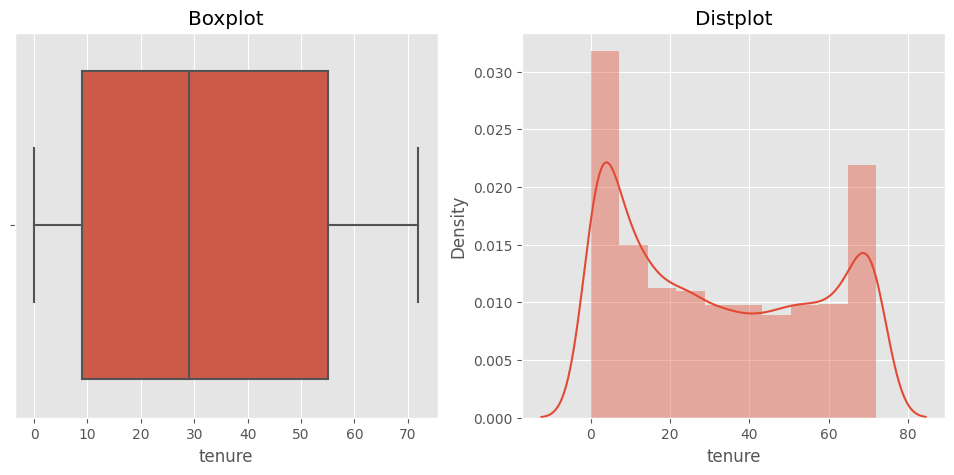

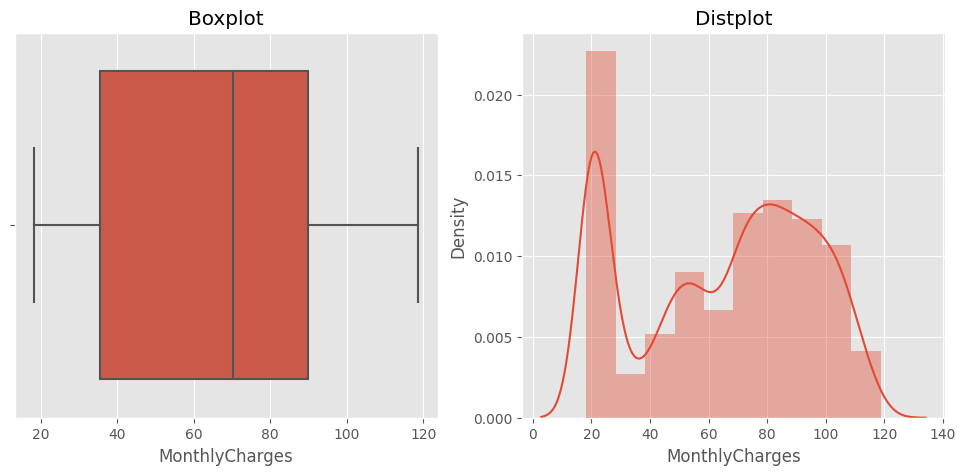

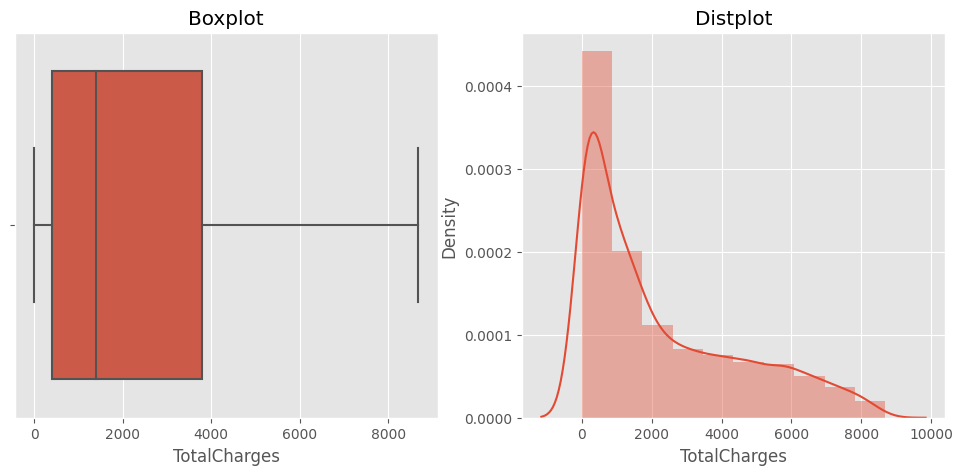

In [13]:
cont_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

# boxplot and distribution plot
for col in cont_cols:
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))
    
    sns.boxplot(customer_data[col], ax=ax[0])
    ax[0].set_title('Boxplot')

    sns.distplot(customer_data[col], bins=10, kde=True, ax=ax[1])
    ax[1].set_title('Distplot')
    plt.show()

In [14]:
# function for get upper lower limit
def boundary_limit(data, col):
    
    # find Q1, Q2, and IQR
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    
    print("IQR of " + col + " : ", IQR)
    
    # find the upper and lower boundaries
    upper_limit = Q3 + IQR * 1.5
    lower_limit = Q1 - IQR * 1.5

    print('Upper Limit of ' + col + ' : ', upper_limit)
    print('Lower Limit of ' + col + ' : ', lower_limit)
    
    print('Number of Outliers Records : ', (data[data[col] > upper_limit].shape[0] + data[data[col] < lower_limit].shape[0]))

In [15]:
for col in cont_cols:
    print("****** Boundary limits of " + col + " *****")
    boundary_limit(customer_data, col)
    print('')

****** Boundary limits of tenure *****
IQR of tenure :  46.0
Upper Limit of tenure :  124.0
Lower Limit of tenure :  -60.0
Number of Outliers Records :  0

****** Boundary limits of MonthlyCharges *****
IQR of MonthlyCharges :  54.349999999999994
Upper Limit of MonthlyCharges :  171.375
Lower Limit of MonthlyCharges :  -46.02499999999999
Number of Outliers Records :  0

****** Boundary limits of TotalCharges *****
IQR of TotalCharges :  3388.0499999999997
Upper Limit of TotalCharges :  8868.675
Lower Limit of TotalCharges :  -4683.525
Number of Outliers Records :  0



### 2.3. Handling Data Redundancy

In [16]:
customer_data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [17]:
# replace ‘No internet service’ and  ‘No phone service’ into 'No'
customer_data.replace('No internet service','No',inplace=True)
customer_data.replace('No phone service','No',inplace=True)

In [18]:
customer_data['MultipleLines'].unique()

array(['No', 'Yes'], dtype=object)

### 2.4. Feature Extraction

In [19]:
# Create Total Service Received
customer_data['Total_Services'] = (
    customer_data[['PhoneService', 'InternetService', 'OnlineSecurity', 
                   'OnlineBackup', 'DeviceProtection', 'TechSupport', 
                   'StreamingTV', 'StreamingMovies']] != 'No').sum(axis=1)
customer_data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Total_Services
0,Female,No,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,2
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,4
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,4
3,Male,No,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,4
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,2


In [20]:
# create average monthly payments
customer_data["Avg_Monthly_Payments"] = customer_data["TotalCharges"] / customer_data["tenure"]
customer_data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Total_Services,Avg_Monthly_Payments
0,Female,No,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,2,29.850000
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,4,55.573529
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,4,54.075000
3,Male,No,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,4,40.905556
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,2,75.825000


In [21]:
# Create total months
customer_data['Total_Months'] = customer_data['TotalCharges'] / customer_data['MonthlyCharges']
customer_data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Total_Services,Avg_Monthly_Payments,Total_Months
0,Female,No,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,2,29.850000,1.000000
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,4,55.573529,33.178227
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,4,54.075000,2.008357
3,Male,No,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,4,40.905556,43.516548
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,2,75.825000,2.144979


## 3. Exploratory Data Analysis - EDA
### 3.1. categorical and Numerical Features

In [22]:
# Separate categorical and numerical features
def extract_features(data):
    
    cat_features = data.select_dtypes(include=['object']).columns
    num_features = data.select_dtypes(exclude=['object']).columns

    return cat_features, num_features

In [23]:
categorical, numerical = extract_features(customer_data)
print('Number of Categorical Variables : ', len(categorical))
print('Categorical Variables : ', categorical)

print('Number of Numerical Variables : ', len(numerical))
print('Numerical Variables : ', numerical)

Number of Categorical Variables :  17
Categorical Variables :  Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')
Number of Numerical Variables :  6
Numerical Variables :  Index(['tenure', 'MonthlyCharges', 'TotalCharges', 'Total_Services',
       'Avg_Monthly_Payments', 'Total_Months'],
      dtype='object')


### Value Counts of Categorical Features

In [24]:
# get value counts of each categorical features
for col in categorical:
    print("****** Analysis of " + col + " *****")
    print('Value Counts')
    print(customer_data[col].value_counts())
    print("")
    
    print('Value Counts %')
    print((customer_data[col].value_counts() / len(customer_data[col])) * 100)
    print("")
    
    print('Relationship with Target Variable')
    print(customer_data.groupby("Churn")[col].value_counts())
    print("")
    
    print('Relationship with Target Variable in %')
    print((customer_data.groupby("Churn")[col].value_counts() / len(customer_data[col])) * 100)
    print("")

****** Analysis of gender *****
Value Counts
Male      3555
Female    3488
Name: gender, dtype: int64

Value Counts %
Male      50.47565
Female    49.52435
Name: gender, dtype: float64

Relationship with Target Variable
Churn  gender
No     Male      2625
       Female    2549
Yes    Female     939
       Male       930
Name: gender, dtype: int64

Relationship with Target Variable in %
Churn  gender
No     Male      37.271049
       Female    36.191964
Yes    Female    13.332387
       Male      13.204600
Name: gender, dtype: float64

****** Analysis of SeniorCitizen *****
Value Counts
No     5901
Yes    1142
Name: SeniorCitizen, dtype: int64

Value Counts %
No     83.785319
Yes    16.214681
Name: SeniorCitizen, dtype: float64

Relationship with Target Variable
Churn  SeniorCitizen
No     No               4508
       Yes               666
Yes    No               1393
       Yes               476
Name: SeniorCitizen, dtype: int64

Relationship with Target Variable in %
Churn  SeniorCiti

### 3.2. Distribution of Categorical Features

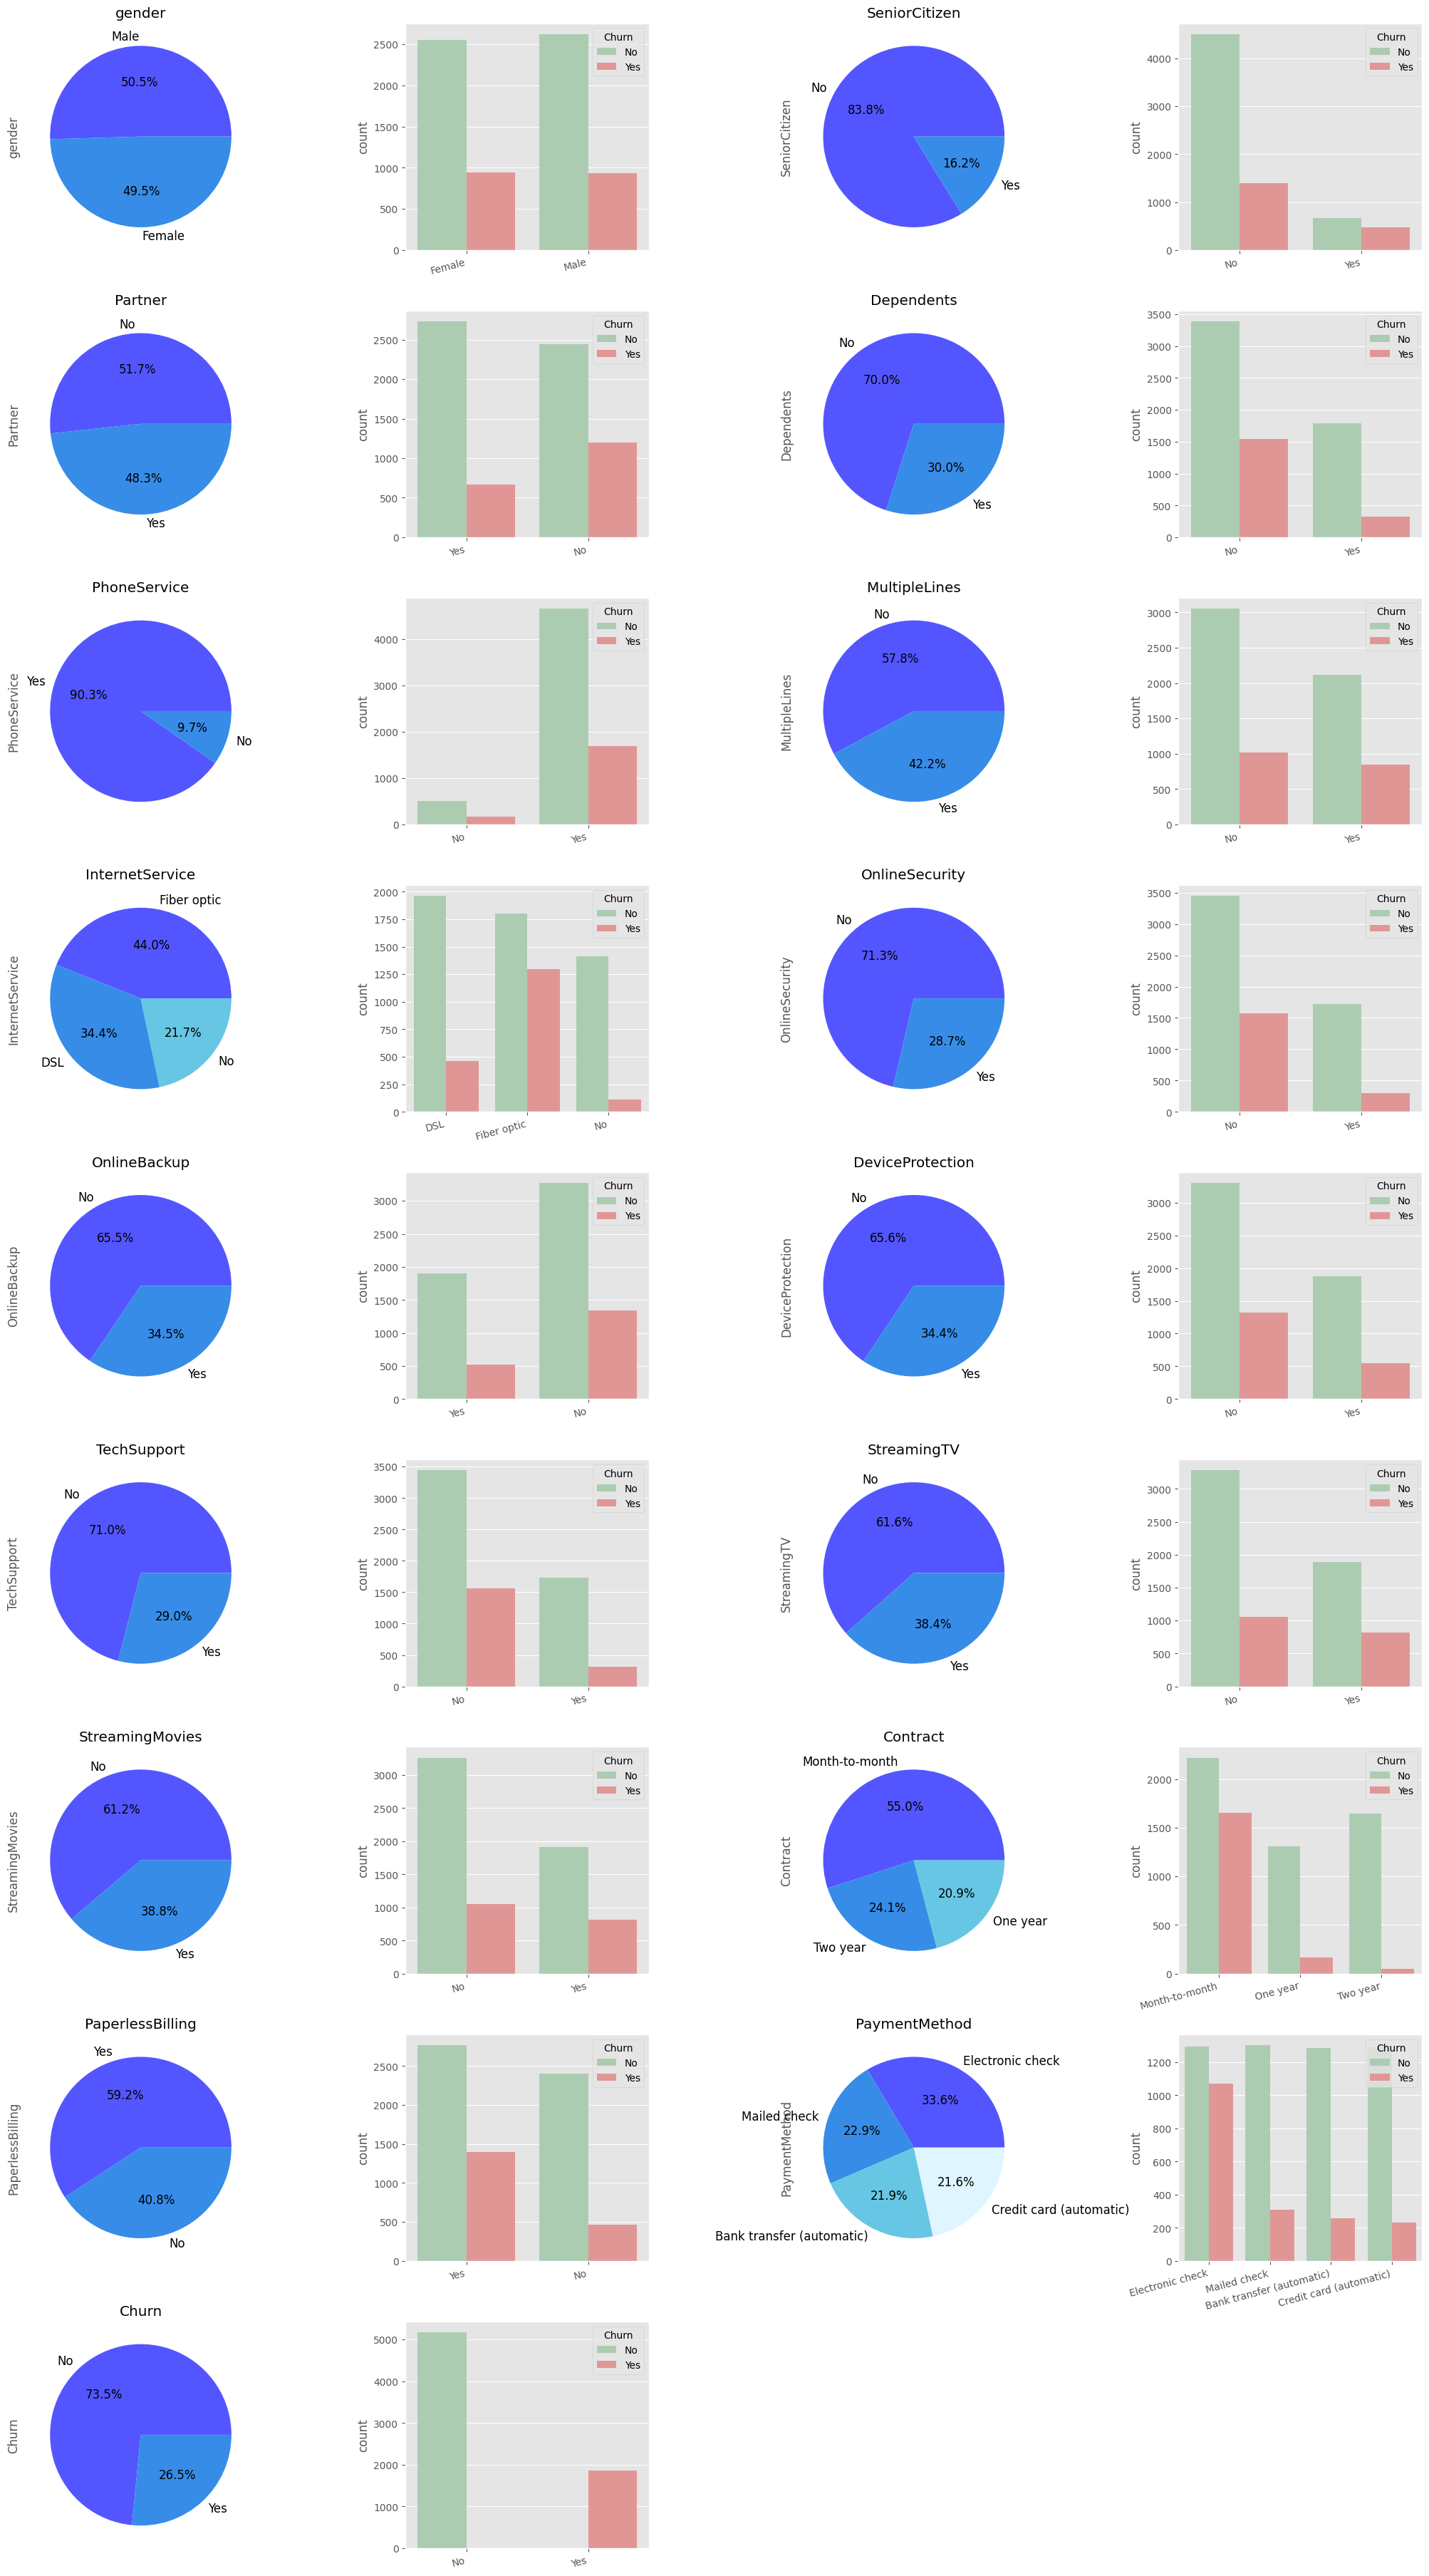

In [25]:
clrs = ["#5356FF" , "#378CE7" , "#67C6E3", "#DFF5FF"]
plt.figure(figsize=(20, 40))

for i, col in enumerate(categorical):
    plt.subplot(10, 4, i*2+1)
    
    counts = customer_data[col].value_counts()
    
    plt.title(col)
    counts.plot(kind = 'pie', fontsize = 12, colors = clrs, 
                autopct = '%.1f%%')
    
    plt.subplot(10, 4, i*2+2)
    sns.countplot(data=customer_data,
                  x=col,
                  hue='Churn',
                  palette=['#a7d1ae', '#ed8a8a'])
    plt.xticks(rotation=15, ha='right')
    plt.xlabel('')

plt.tight_layout()
plt.show()

Based on the above outputs, we can conclude the following:
- The gender feature does not affect the client's decision.
- The older people are more likely to refuse services.
- Clients in relationships, as well as clients with children, are less likely to refuse services. Perhaps the company will present favorable family tariffs.
- Customers with fiber optic more often refuse services. Customers who do not use the Internet very rarely refuse.
- Clients who use protection systems, as well as those who use cloud storage, are more likely to refuse. Competitors also have favorable package offers with additional services.
- Customers who do not contact technical support are more likely to refuse.
- Logical, clients with a short-term contract leave more often.
- Customers who receive and pay bills conservatively are less likely to change service providers.

### 3.3. Distribution of Numerical Features

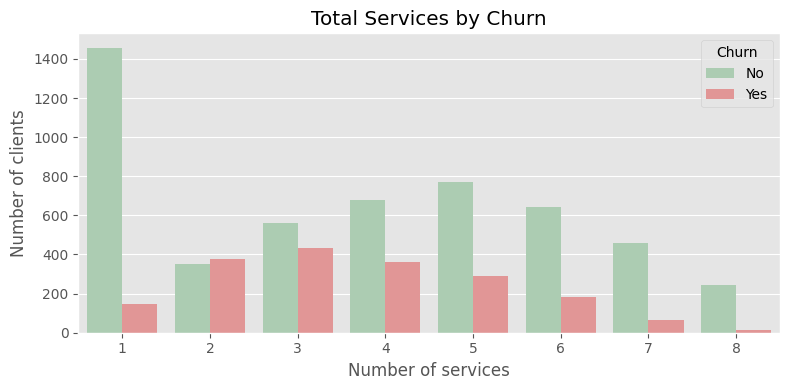

In [26]:
# count plot for total services
plt.figure(figsize=[8, 4])

sns.countplot(data=customer_data,
              x='Total_Services',
              hue='Churn',
              palette=['#a7d1ae', '#ed8a8a'])
plt.title('Total Services by Churn')
plt.xlabel('Number of services')
plt.ylabel('Number of clients')

plt.tight_layout()
plt.show()

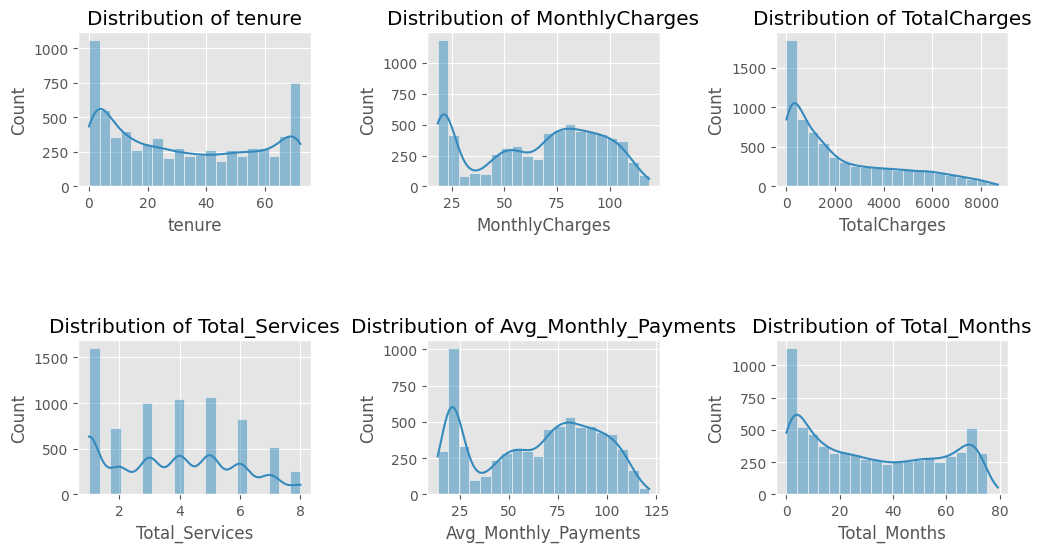

In [27]:
churned = customer_data[customer_data['Churn'] == 'Yes']
not_churned = customer_data[customer_data['Churn'] == 'No']

plt.figure(figsize = (12, 6))
plt.subplots_adjust(hspace = 1, wspace=0.5)

# histogram for numerical features
for i, col in enumerate(numerical):
    plt.subplot(2, 3, i+1)
    sns.histplot(customer_data, x = col, kde = True, bins = 20)
    plt.title("Distribution of " + col)

plt.show()

### 3.4. Q-Q Plots

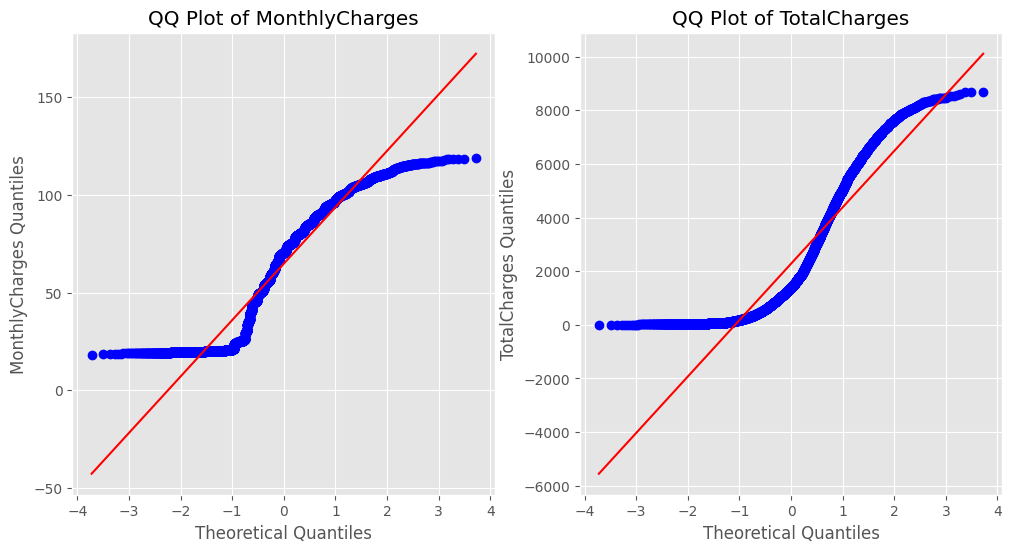

In [28]:
qq_total = customer_data['TotalCharges']
qq_monthly = customer_data['MonthlyCharges']
qq_data = [qq_monthly, qq_total]
qq_cols = ['MonthlyCharges', 'TotalCharges']

# Q-Q Plot 
plt.figure(figsize = (12, 6))
for i, col in enumerate(qq_cols):
    plt.subplot(1, 2, i+1)
    stats.probplot(qq_data[i], plot=plt)
    plt.xlabel('Theoretical Quantiles')
    plt.ylabel(col + ' Quantiles')
    plt.title('QQ Plot of ' + col)

plt.show()

In [29]:
# Shapiro-Wilk Test
for i, col in enumerate(qq_cols):
    shapiro_test = stats.shapiro(qq_data[i])
    statistic, p_value = shapiro_test
    print('Shapiro-Wilk Test for ' + col)
    print(f"Shapiro-Wilk Test Statistic: {statistic:.4f}")
    print(f"p-value: {p_value:.2f}")

    if p_value > 0.05:
        print("The data in " + col + "seems to be normally distributed.")
    else:
        print("The data in " + col + " might not be normally distributed.")
    print('')

Shapiro-Wilk Test for MonthlyCharges
Shapiro-Wilk Test Statistic: 0.9209
p-value: 0.00
The data in MonthlyCharges might not be normally distributed.

Shapiro-Wilk Test for TotalCharges
Shapiro-Wilk Test Statistic: 0.8602
p-value: 0.00
The data in TotalCharges might not be normally distributed.



### 3.5. Monthly Charges vs Total Charges

Text(0.5, 1.0, 'Monthly Charges vs Total Charges')

<Figure size 800x600 with 0 Axes>

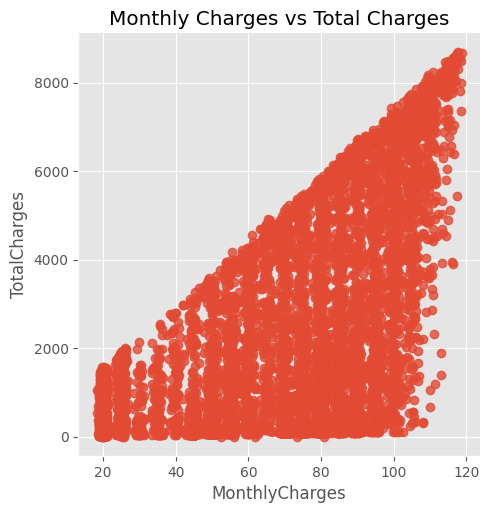

In [30]:
# Relationship between Monthly Charges and Total Charges
plt.figure(figsize=(8, 6))
sns.lmplot(data=customer_data, x='MonthlyCharges', 
           y='TotalCharges', fit_reg=False)
plt.title('Monthly Charges vs Total Charges')

- The conclusion drawn from the lmplot above suggests a **positive correlation between Monthly Charges and Total Charges.** In simpler terms, as the Monthly Charges increase, so do the Total Charges incurred.

### Churn by Tenure, Monthly Charges and Total Charges

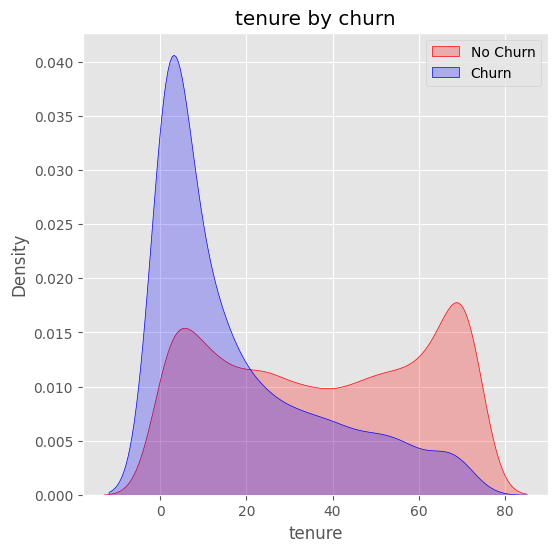

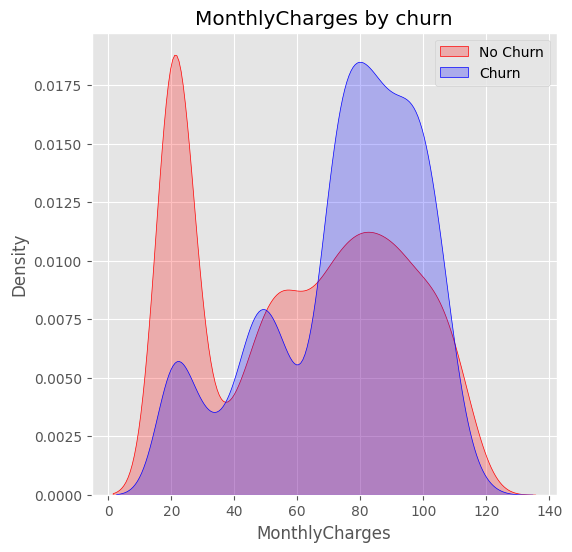

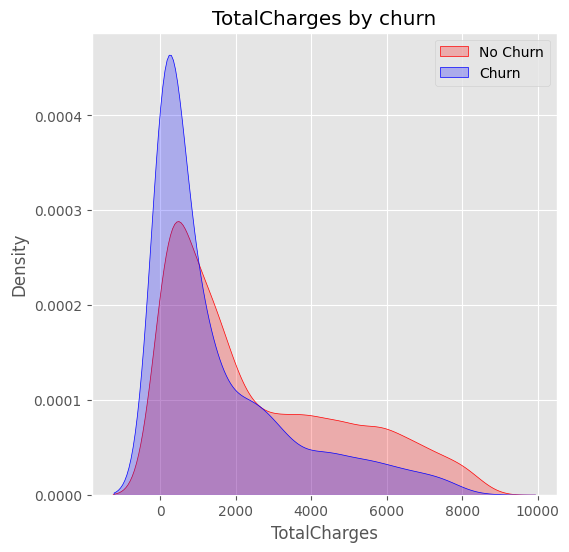

In [31]:
for col in ['tenure', 'MonthlyCharges', 'TotalCharges']:
    
    plt.figure(figsize=(6, 6))
    ten = sns.kdeplot(customer_data[col][(customer_data["Churn"] == 'No') ],
                    color="Red", shade = True)
    ten = sns.kdeplot(customer_data[col][(customer_data["Churn"] == 'Yes') ],
                    ax =ten, color="Blue", shade= True)
    ten.legend(["No Churn","Churn"], loc='upper right')
    ten.set_ylabel('Density')
    ten.set_xlabel(col)
    ten.set_title(col + ' by churn')

- The density plot depicting the **relationship between Tenure and Churn** reveals insightful patterns. It suggests that churn rates are elevated among customers with shorter tenure periods, indicating a propensity for new customers to churn. Conversely, as tenure increases, the likelihood of churn diminishes, with a higher concentration of customers exhibiting no churn.
- The density plot analysis between **Monthly Charges and Churn** reveals an insightful trend. It suggests that churn rates tend to increase notably as Monthly Charges rise, indicating a correlation between higher charges and customer attrition. Conversely, the density of non-churn instances is higher when Monthly Charges are lower, suggesting a potential inverse relationship between charges and customer retention.
- The conclusion drawn from the density plot depicting the relationship between **Total Charges and Churn** is rather unexpected. It reveals that instances of both churn and no-churn are notably high when Total Charges are low.

## 4. Handling with Categorical Features
### 4.1. Label Encoding

In [32]:
# take a backup
customer_encoded = customer_data.copy()
customer_encoded.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Total_Services,Avg_Monthly_Payments,Total_Months
0,Female,No,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,2,29.850000,1.000000
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,4,55.573529,33.178227
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,4,54.075000,2.008357
3,Male,No,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,4,40.905556,43.516548
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,2,75.825000,2.144979


In [33]:
# label encoding 
le = LabelEncoder()

for col in categorical:
    customer_encoded[col] = le.fit_transform(customer_encoded[col])
    
customer_encoded.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Total_Services,Avg_Monthly_Payments,Total_Months
0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,2,29.85,29.85,0,2,29.850000,1.000000
1,1,0,0,0,34,1,0,0,1,0,1,0,0,0,1,0,3,56.95,1889.50,0,4,55.573529,33.178227
2,1,0,0,0,2,1,0,0,1,1,0,0,0,0,0,1,3,53.85,108.15,1,4,54.075000,2.008357
3,1,0,0,0,45,0,0,0,1,0,1,1,0,0,1,0,0,42.30,1840.75,0,4,40.905556,43.516548
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1,2,75.825000,2.144979


In [34]:
customer_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   gender                7043 non-null   int32  
 1   SeniorCitizen         7043 non-null   int32  
 2   Partner               7043 non-null   int32  
 3   Dependents            7043 non-null   int32  
 4   tenure                7043 non-null   int64  
 5   PhoneService          7043 non-null   int32  
 6   MultipleLines         7043 non-null   int32  
 7   InternetService       7043 non-null   int32  
 8   OnlineSecurity        7043 non-null   int32  
 9   OnlineBackup          7043 non-null   int32  
 10  DeviceProtection      7043 non-null   int32  
 11  TechSupport           7043 non-null   int32  
 12  StreamingTV           7043 non-null   int32  
 13  StreamingMovies       7043 non-null   int32  
 14  Contract              7043 non-null   int32  
 15  PaperlessBilling     

## 5. Correlation Heatmap

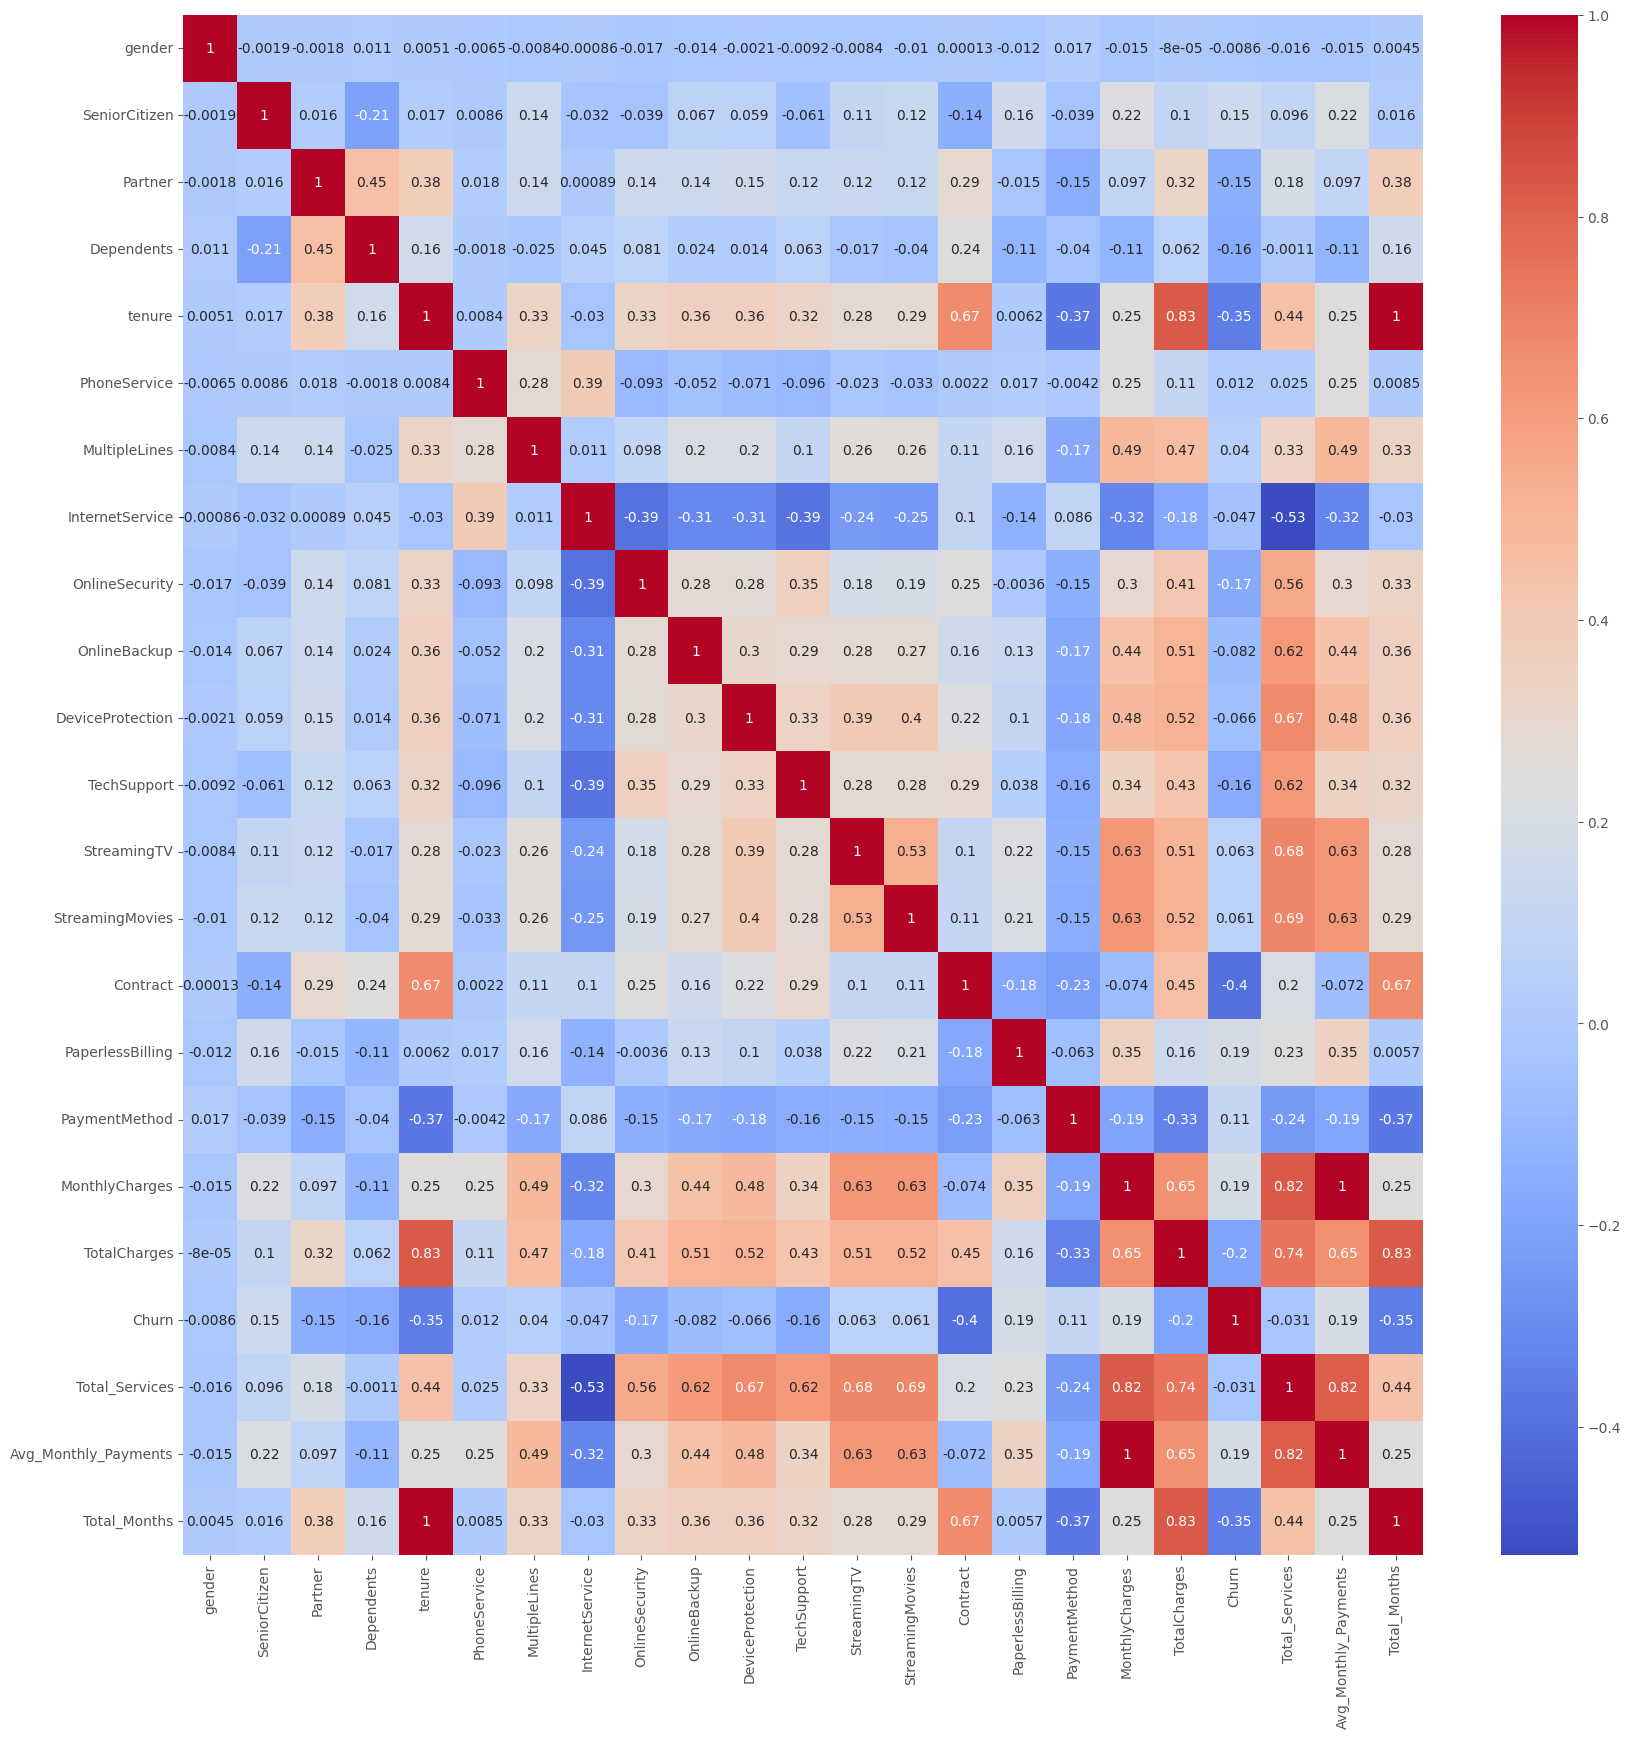

In [35]:
# Finds correlation using heatmap
plt.figure(figsize = (20,20))
sns.heatmap(customer_encoded.corr(), annot = True, cmap = "coolwarm")
plt.show()

- The **total month feature is 100% correlated with the tenure** feature and the **Average Monthly Payments feature is 100% correlated with Monthly Charges** features. So, we can remove the Total Month and Average Monthly Payments features.
- **Senior Citizens, Phone Service, Multiple Lines, Streaming TV, Streaming Movies, Paperless Billing, Payment Methods, Monthly Charges, and Average Monthly Payments** have a positive correlation with Churn.
- **Gender, Dependents, Partner, Internet Services, Online Security, Online Backup, Device Protection, Tech Support, Contract, Total Services, tenure, Total Months, and Total charges** have a negative correlation with Churn.

In [36]:
# identify more correlated feature 
def cor_feature(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

# call the function with 0.9 threshold
cor_feature(customer_encoded, 0.9)

{'Avg_Monthly_Payments', 'Total_Months'}

In [37]:
# drop highly correlated features
customer_encoded = customer_encoded.drop(['Avg_Monthly_Payments', 'Total_Months'],
                                  axis=1)
customer_encoded.shape

(7043, 21)

## 6. Scaling the data

In [38]:
scale_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
# Scaling the numerical data
sc = StandardScaler()

customer_encoded[scale_cols] = sc.fit_transform(customer_encoded[scale_cols])
customer_encoded.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Total_Services
0,0,0,1,0,-1.277445,0,0,0,0,1,0,0,0,0,0,1,2,-1.160323,-0.992611,0,2
1,1,0,0,0,0.066327,1,0,0,1,0,1,0,0,0,1,0,3,-0.259629,-0.172165,0,4
2,1,0,0,0,-1.236724,1,0,0,1,1,0,0,0,0,0,1,3,-0.362660,-0.958066,1,4
3,1,0,0,0,0.514251,0,0,0,1,0,1,1,0,0,1,0,0,-0.746535,-0.193672,0,4
4,0,0,0,0,-1.236724,1,0,1,0,0,0,0,0,0,0,1,2,0.197365,-0.938874,1,2


## 7. Split the data
### 7.1. Independent and Dependent features

In [39]:
customer_encoded.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn', 'Total_Services'],
      dtype='object')

In [40]:
# Independent features
X = customer_encoded.drop(['Churn'], axis=1)

# Dependent feature
y = customer_encoded['Churn']

print(X.shape)
print(y.shape)

(7043, 20)
(7043,)


### 7.2. Split the dataset into Training and Testing

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size = 0.2, 
                                                    random_state = 42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(5634, 20) (5634,)
(1409, 20) (1409,)


## 8. Handling Imbalanced Data

<AxesSubplot: xlabel='Churn', ylabel='count'>

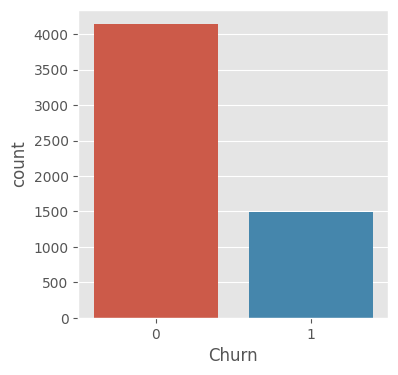

In [42]:
plt.figure(figsize=(4, 4))
sns.countplot(x=y_train)

In [43]:
# count of Churn
print("The number of classes {}".format(Counter(y_train)))

The number of classes Counter({0: 4138, 1: 1496})


In [44]:
# # under sampling
# from imblearn.under_sampling import NearMiss
# ns = NearMiss()
# X_train_ns,y_train_ns = ns.fit_resample(X_train, y_train)

# print("The number of classes before fit {}".format(Counter(y_train)))
# print("The number of classes after fit {}".format(Counter(y_train_ns)))

In [45]:
# SMOTEENN sampling
smn = SMOTEENN()
X_train_ns, y_train_ns = smn.fit_resample(X_train, y_train)

print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))

The number of classes before fit Counter({0: 4138, 1: 1496})
The number of classes after fit Counter({1: 2952, 0: 2205})


## 9. Model Training and Prediction

In [46]:
# Confusion Matrix function
def plot_confusion_matrix(cm, classes=None):
    
    plt.figure(figsize=(6,6))
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm, xticklabels=classes, yticklabels=classes, 
                    vmin=0., vmax=1., annot=True, annot_kws={'size':50})
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title('Confusion Matrix')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

### 9.1. Logistic Regression

In [47]:
# before handling imbalance
model_log = LogisticRegression(max_iter=2000)
model_log.fit(X_train, y_train)

LogisticRegression(max_iter=2000)

In [48]:
# Predict the response for train dataset
tr_pred_log = model_log.predict(X_train_ns)
tr_pred_log

array([0, 0, 0, ..., 0, 1, 1])

In [49]:
# prediction of test data
y_pred_log = model_log.predict(X_test)
y_pred_log

array([1, 0, 0, ..., 0, 0, 1])

In [50]:
# prediction probability of test data
proba_log = model_log.predict_proba(X_test)
proba_log

array([[0.3517328 , 0.6482672 ],
       [0.94016781, 0.05983219],
       [0.9951587 , 0.0048413 ],
       ...,
       [0.95666073, 0.04333927],
       [0.98562537, 0.01437463],
       [0.44270129, 0.55729871]])

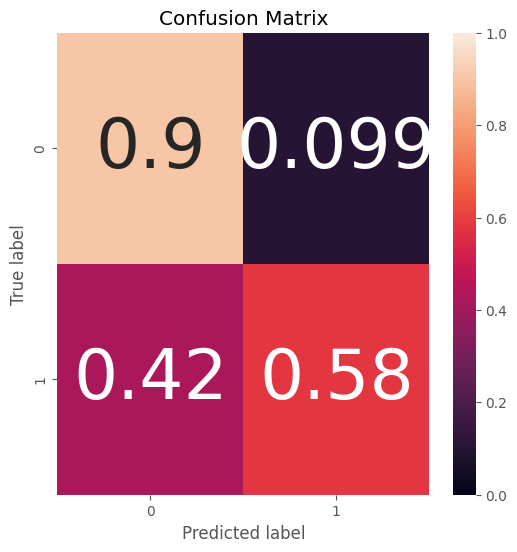

In [51]:
# Plotting Confusion Matrix
cm = confusion_matrix(y_test, y_pred_log)
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
plot_confusion_matrix(cm_norm, classes=model_log.classes_)

In [52]:
# model performence metrics
tr_accuracy_log = accuracy_score(y_train_ns, tr_pred_log)
accuracy_log = accuracy_score(y_test, y_pred_log)
precision_log = precision_score(y_test, y_pred_log)
recall_log = recall_score(y_test, y_pred_log)
f1_log = f1_score(y_test, y_pred_log)

print("Training Accuracy:", tr_accuracy_log)
print("Accuracy:", accuracy_log)
print("Recall:", recall_log)
print("Precision:", precision_log)
print("F1 Score:", f1_log)

Training Accuracy: 0.7907698274190421
Accuracy: 0.8161816891412349
Recall: 0.5817694369973191
Precision: 0.678125
F1 Score: 0.6262626262626263


### 9.2. K-Nearest Neigbours 

In [53]:
model_knn = KNeighborsClassifier(n_neighbors=7)
model_knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [54]:
# Predict the response for training dataset
tr_pred_knn = model_knn.predict(X_train_ns)
tr_pred_knn

array([0, 0, 0, ..., 1, 1, 1])

In [55]:
# prediction of test data
y_pred_knn = model_knn.predict(X_test)
y_pred_knn

array([1, 0, 0, ..., 0, 0, 0])

In [56]:
# prediction probability of test data
proba_knn = model_knn.predict_proba(X_test)
proba_knn

array([[0.28571429, 0.71428571],
       [1.        , 0.        ],
       [1.        , 0.        ],
       ...,
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.57142857, 0.42857143]])

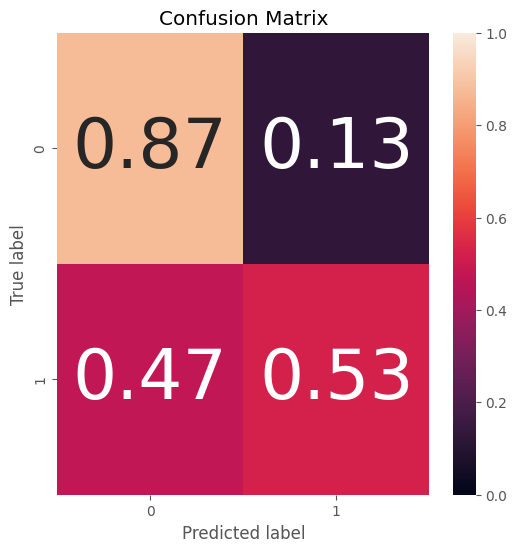

In [57]:
# Plotting Confusion Matrix
cm = confusion_matrix(y_test, y_pred_knn)
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
plot_confusion_matrix(cm_norm, classes=model_knn.classes_)

In [58]:
# model performence metrics
tr_accuracy_knn = accuracy_score(y_train_ns, tr_pred_knn)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)

print("Training Accuracy:", tr_accuracy_knn)
print("Accuracy:", accuracy_knn)
print("Recall:", recall_knn)
print("Precision:", recall_knn)
print("F1 Score:", f1_knn)

Training Accuracy: 0.8615474112856312
Accuracy: 0.7799858055358411
Recall: 0.5254691689008043
Precision: 0.5254691689008043
F1 Score: 0.5584045584045585


### 9.3. Random Forest Classifier

In [59]:
model_rfc = RandomForestClassifier(n_estimators=50, 
                                   max_depth=10, 
                                   random_state=42)
model_rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=50, random_state=42)

In [60]:
# Predict the response for training dataset
tr_pred_rfc = model_rfc.predict(X_train_ns)
tr_pred_rfc

array([0, 0, 0, ..., 0, 1, 1])

In [61]:
# prediction of test data
y_pred_rfc = model_rfc.predict(X_test)
y_pred_rfc

array([1, 0, 0, ..., 0, 0, 1])

In [62]:
# prediction probability of test data
proba_rfc = model_rfc.predict_proba(X_test)
proba_rfc

array([[0.34135767, 0.65864233],
       [0.92417965, 0.07582035],
       [0.97950758, 0.02049242],
       ...,
       [0.99495631, 0.00504369],
       [0.94538573, 0.05461427],
       [0.44123968, 0.55876032]])

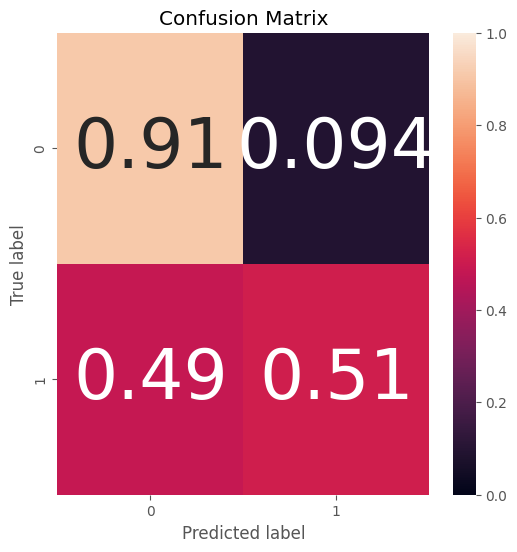

In [63]:
# Plotting Confusion Matrix
cm = confusion_matrix(y_test, y_pred_rfc)
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
plot_confusion_matrix(cm_norm, classes=model_rfc.classes_)

In [64]:
# model performence metrics
tr_accuracy_rfc = accuracy_score(y_train_ns, tr_pred_rfc)
accuracy_rfc = accuracy_score(y_test, y_pred_rfc)
precision_rfc = precision_score(y_test, y_pred_rfc)
recall_rfc = recall_score(y_test, y_pred_rfc)
f1_rfc = f1_score(y_test, y_pred_rfc)

print("Training Accuracy:", tr_accuracy_rfc)
print("Accuracy:", accuracy_rfc)
print("Recall:", accuracy_rfc)
print("Precision:", precision_rfc)
print("F1 Score:", f1_rfc)

Training Accuracy: 0.8163661043242195
Accuracy: 0.8026969481902059
Recall: 0.8026969481902059
Precision: 0.6643598615916955
F1 Score: 0.5800604229607251


### 9.4. XG Boost

In [65]:
model_xgb = XGBClassifier(objective="binary:logistic", 
                          random_state=42, 
                          enable_categorical=True)
model_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=True, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [66]:
# Predict the response for training dataset
tr_pred_xgb = model_xgb.predict(X_train_ns)
tr_pred_xgb

array([0, 0, 0, ..., 1, 1, 1])

In [67]:
# prediction of test data
y_pred_xgb = model_xgb.predict(X_test)
y_pred_xgb

array([1, 0, 0, ..., 0, 0, 1])

In [68]:
# prediction probability of test data
proba_xgb = model_xgb.predict_proba(X_test)
proba_xgb

array([[0.3363673 , 0.6636327 ],
       [0.8280134 , 0.17198655],
       [0.9932011 , 0.00679893],
       ...,
       [0.9578477 , 0.04215229],
       [0.9982501 , 0.00174984],
       [0.3085863 , 0.6914137 ]], dtype=float32)

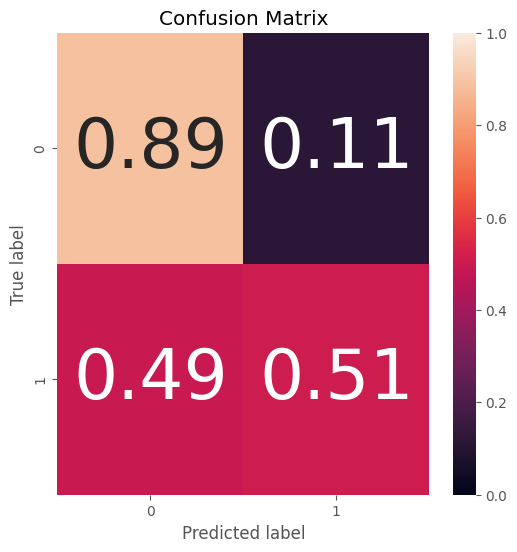

In [69]:
# Plotting Confusion Matrix
cm = confusion_matrix(y_test, y_pred_xgb)
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
plot_confusion_matrix(cm_norm, classes=model_xgb.classes_)

In [70]:
# model performence metrics
tr_accuracy_xgb = accuracy_score(y_train_ns, tr_pred_xgb)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)

print("Training Accuracy:", tr_accuracy_xgb)
print("Accuracy:", accuracy_xgb)
print("Recall:", recall_xgb)
print("Precision:", precision_xgb)
print("F1 Score:", f1_xgb)

Training Accuracy: 0.871049059530735
Accuracy: 0.7877927608232789
Recall: 0.5067024128686327
Precision: 0.6217105263157895
F1 Score: 0.5583456425406205


## 10. Model Training and Predictions (Balanced data)

In [71]:
bal_log = LogisticRegression(max_iter=2000)
bal_log.fit(X_train_ns, y_train_ns)

LogisticRegression(max_iter=2000)

In [72]:
bal_knn = KNeighborsClassifier(n_neighbors=7)
bal_knn.fit(X_train_ns, y_train_ns)

KNeighborsClassifier(n_neighbors=7)

In [73]:
bal_rfc = RandomForestClassifier(n_estimators=50, 
                                 max_depth=10, 
                                 random_state=42)
bal_rfc.fit(X_train_ns, y_train_ns)

RandomForestClassifier(max_depth=10, n_estimators=50, random_state=42)

In [74]:
bal_xgb = XGBClassifier(objective="binary:logistic", 
                        random_state=42, 
                        enable_categorical=True)
bal_xgb.fit(X_train_ns, y_train_ns)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=True, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [75]:
bal_models = [bal_log, bal_knn, bal_rfc, bal_xgb]
acc = [accuracy_log, accuracy_knn, accuracy_rfc, accuracy_xgb]
prec = [precision_log, precision_knn, precision_rfc, precision_xgb]
rec = [recall_log, recall_knn, recall_rfc, recall_xgb]
f1 = [f1_log, f1_knn, f1_rfc, f1_xgb]
models = ['Logistic', 'K-NN', 'Random Forest', 'XG Boost']
# compare models
def compare_model(model_name, model, acc):
    print('***** ' + model_name + ' model ******')
    print('Accuracy for without handle imbalance data: ', acc)
    print('Accuracy for with handle imbalanced data: ', accuracy_score(y_test, model.predict(X_test)))
    print('')
    
# call function
for i in range(len(bal_models)):
    compare_model(models[i], bal_models[i], acc[i])

***** Logistic model ******
Accuracy for without handle imbalance data:  0.8161816891412349
Accuracy for with handle imbalanced data:  0.7281760113555713

***** K-NN model ******
Accuracy for without handle imbalance data:  0.7799858055358411
Accuracy for with handle imbalanced data:  0.6763662171753017

***** Random Forest model ******
Accuracy for without handle imbalance data:  0.8026969481902059
Accuracy for with handle imbalanced data:  0.7402413058907026

***** XG Boost model ******
Accuracy for without handle imbalance data:  0.7877927608232789
Accuracy for with handle imbalanced data:  0.7473385379701917



**Note:**
Following model training and assessing performance both before and after addressing imbalanced data, it's evident that the model achieved higher accuracy before handling the imbalance. Therefore, we'll proceed with the model trained on the original dataset, as it exhibited superior performance. 

## 11. Hyperparameter Tuning

In [77]:
# function for compare before and after tuning
def check_model(model_name, acc, prec, recall, f1, t_acc, t_prec, t_recall, t_f1):
    print('***** ' + model_name + ' Model ******')
    print('')
    print('Before Hyperparameter Tuning')
    print("Accuracy:", acc)
    print("Precision:", prec)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print('')
    print('After Hyperparameter Tuning')
    print("Accuracy:", t_acc)
    print("Precision:", t_prec)
    print("Recall:", t_recall)
    print("F1 Score:", t_f1)
    print('')

### 11.1. Logistic Regression

In [78]:
# list the hyperparameters for tuning
log_parameters = [{'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']},
                  {'penalty':['none',  'l2']},
                  {'C':[ 0.01, 0.1, 1, 10, 100]},
                  {'max_iter':[100, 2000, 3000, 4000, 5000, 7000, 10000, 20000, 50000]}]

# Tuned logistic model
tuned_log = RandomizedSearchCV(model_log,
                               log_parameters,
                               scoring = 'f1',
                               cv = 5,
                               verbose=3)

tuned_log.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END .....................max_iter=4000;, score=0.636 total time=   0.0s
[CV 2/5] END .....................max_iter=4000;, score=0.594 total time=   0.0s
[CV 3/5] END .....................max_iter=4000;, score=0.564 total time=   0.0s
[CV 4/5] END .....................max_iter=4000;, score=0.567 total time=   0.0s
[CV 5/5] END .....................max_iter=4000;, score=0.570 total time=   0.0s
[CV 1/5] END ..................solver=newton-cg;, score=0.636 total time=   0.0s
[CV 2/5] END ..................solver=newton-cg;, score=0.594 total time=   0.0s
[CV 3/5] END ..................solver=newton-cg;, score=0.564 total time=   0.0s
[CV 4/5] END ..................solver=newton-cg;, score=0.567 total time=   0.0s
[CV 5/5] END ..................solver=newton-cg;, score=0.570 total time=   0.0s
[CV 1/5] END ......................max_iter=100;, score=0.636 total time=   0.0s
[CV 2/5] END ......................max_iter=100;

RandomizedSearchCV(cv=5, estimator=LogisticRegression(max_iter=2000),
                   param_distributions=[{'solver': ['newton-cg', 'lbfgs',
                                                    'liblinear', 'sag',
                                                    'saga']},
                                        {'penalty': ['none', 'l2']},
                                        {'C': [0.01, 0.1, 1, 10, 100]},
                                        {'max_iter': [100, 2000, 3000, 4000,
                                                      5000, 7000, 10000, 20000,
                                                      50000]}],
                   scoring='f1', verbose=3)

In [79]:
# getting the model with the best parameters
tuned_log.best_estimator_

LogisticRegression(max_iter=2000, penalty='none')

In [80]:
tuned_log.best_params_

{'penalty': 'none'}

In [81]:
# Final logistic model
final_log = LogisticRegression(max_iter=2000, 
                               penalty='none')
final_log.fit(X_train, y_train)

LogisticRegression(max_iter=2000, penalty='none')

In [82]:
# use testing data to predict
y_pred_log2 = final_log.predict(X_test)
y_pred_log2

array([1, 0, 0, ..., 0, 0, 1])

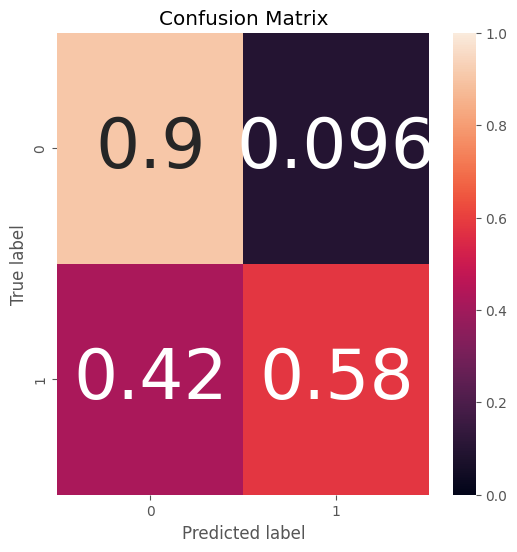

In [83]:
# Plotting Confusion Matrix
cm = confusion_matrix(y_test, y_pred_log2)
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
plot_confusion_matrix(cm_norm, classes=final_log.classes_)

In [84]:
log_tuning_accuracy = accuracy_score(y_test, y_pred_log2)
log_tuning_precision = precision_score(y_test, y_pred_log2)
log_tuning_recall = recall_score(y_test, y_pred_log2)
log_tuning_f1 = f1_score(y_test, y_pred_log2)

check_model(models[0], acc[0], prec[0], rec[0], f1[0],
           log_tuning_accuracy, log_tuning_precision, log_tuning_recall, log_tuning_f1)

***** Logistic Model ******

Before Hyperparameter Tuning
Accuracy: 0.8161816891412349
Precision: 0.678125
Recall: 0.5817694369973191
F1 Score: 0.6262626262626263

After Hyperparameter Tuning
Accuracy: 0.8183108587650816
Precision: 0.6857142857142857
Recall: 0.579088471849866
F1 Score: 0.627906976744186



- There is a **slight improvement** in the Logistic model after the hyperparameter tuning.

### 11.2. K-Nearest Neigbours

In [85]:
# list hyperparameter of knn
knn_params = {'n_neighbors' : range(2, 12),
              'weights' : ['uniform', 'distance'],
              'metric' : ['minkowski', 'euclidean', 'manhattan']}

# new logistic model
tuned_knn = RandomizedSearchCV(model_knn,
                               knn_params,
                               scoring = 'f1',
                               cv = 5,
                               verbose=3)

tuned_knn.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END metric=euclidean, n_neighbors=5, weights=distance;, score=0.539 total time=   0.0s
[CV 2/5] END metric=euclidean, n_neighbors=5, weights=distance;, score=0.504 total time=   0.0s
[CV 3/5] END metric=euclidean, n_neighbors=5, weights=distance;, score=0.505 total time=   0.0s
[CV 4/5] END metric=euclidean, n_neighbors=5, weights=distance;, score=0.507 total time=   0.0s
[CV 5/5] END metric=euclidean, n_neighbors=5, weights=distance;, score=0.527 total time=   0.0s
[CV 1/5] END metric=euclidean, n_neighbors=11, weights=distance;, score=0.574 total time=   0.0s
[CV 2/5] END metric=euclidean, n_neighbors=11, weights=distance;, score=0.532 total time=   0.0s
[CV 3/5] END metric=euclidean, n_neighbors=11, weights=distance;, score=0.542 total time=   0.0s
[CV 4/5] END metric=euclidean, n_neighbors=11, weights=distance;, score=0.529 total time=   0.0s
[CV 5/5] END metric=euclidean, n_neighbors=11, weights=distance;, score

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=7),
                   param_distributions={'metric': ['minkowski', 'euclidean',
                                                   'manhattan'],
                                        'n_neighbors': range(2, 12),
                                        'weights': ['uniform', 'distance']},
                   scoring='f1', verbose=3)

In [86]:
tuned_knn.best_params_

{'weights': 'uniform', 'n_neighbors': 11, 'metric': 'euclidean'}

In [87]:
# getting the model with the best parameters
tuned_knn.best_estimator_

KNeighborsClassifier(metric='euclidean', n_neighbors=11)

In [88]:
# Final KNN model
final_knn = KNeighborsClassifier(metric='euclidean', 
                                 n_neighbors=11)
final_knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=11)

In [89]:
# use testing data to predict
y_pred_knn2 = final_knn.predict(X_test)
y_pred_knn2

array([1, 0, 0, ..., 0, 0, 0])

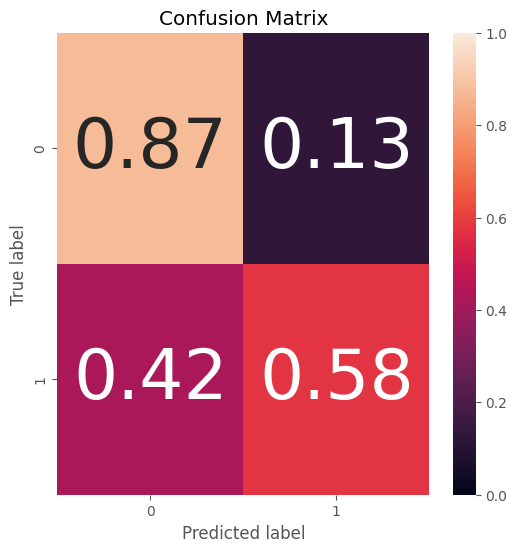

In [90]:
# Plotting Confusion Matrix
cm = confusion_matrix(y_test, y_pred_knn2)
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
plot_confusion_matrix(cm_norm, classes=final_knn.classes_)

In [91]:
knn_tuning_accuracy = accuracy_score(y_test, y_pred_knn2)
knn_tuning_precision = precision_score(y_test, y_pred_knn2)
knn_tuning_recall = recall_score(y_test, y_pred_knn2)
knn_tuning_f1 = f1_score(y_test, y_pred_knn2)

check_model(models[1], acc[1], prec[1], rec[1], f1[1],
           knn_tuning_accuracy, knn_tuning_precision, knn_tuning_recall, knn_tuning_f1)

***** K-NN Model ******

Before Hyperparameter Tuning
Accuracy: 0.7799858055358411
Precision: 0.5957446808510638
Recall: 0.5254691689008043
F1 Score: 0.5584045584045585

After Hyperparameter Tuning
Accuracy: 0.794889992902768
Precision: 0.6213872832369942
Recall: 0.5764075067024129
F1 Score: 0.5980528511821974



- There is a **little improvement** in the KNN model after the hyperparameter tuning.

### 11.3. Random Forest

In [92]:
# set options for the hyperparameters
rf_param_grid = { 
    'n_estimators': [25, 50, 60, 80, 100, 120, 150], 
    'max_features': ['sqrt', 'log2', None], 
    'max_depth': [5, 7, 10, 12, 15, 20, 25, None], 
    'min_samples_leaf': [1, 2, 3, 4, 5],
    'min_samples_split': [2, 3, 4, 5, 6, 7]}

# new logistic model
tuned_rfc = RandomizedSearchCV(model_rfc, 
                               rf_param_grid,
                               cv=5,
                               scoring='f1',
                               verbose=3) 

tuned_rfc.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=7, n_estimators=60;, score=0.598 total time=   0.2s
[CV 2/5] END max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=7, n_estimators=60;, score=0.564 total time=   0.2s
[CV 3/5] END max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=7, n_estimators=60;, score=0.530 total time=   0.2s
[CV 4/5] END max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=7, n_estimators=60;, score=0.554 total time=   0.2s
[CV 5/5] END max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=7, n_estimators=60;, score=0.507 total time=   0.3s
[CV 1/5] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=150;, score=0.588 total time=   1.1s
[CV 2/5] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=150;, score=0.564 total tim

RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(max_depth=10,
                                                    n_estimators=50,
                                                    random_state=42),
                   param_distributions={'max_depth': [5, 7, 10, 12, 15, 20, 25,
                                                      None],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': [1, 2, 3, 4, 5],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7],
                                        'n_estimators': [25, 50, 60, 80, 100,
                                                         120, 150]},
                   scoring='f1', verbose=3)

In [93]:
tuned_rfc.best_params_

{'n_estimators': 60,
 'min_samples_split': 7,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 20}

In [94]:
# getting the model with the best parameters
tuned_rfc.best_estimator_

RandomForestClassifier(max_depth=20, min_samples_leaf=4, min_samples_split=7,
                       n_estimators=60, random_state=42)

In [95]:
# Final Random Forest model
final_rfc = RandomForestClassifier(max_depth=20, min_samples_leaf=4, 
                                   min_samples_split=7,
                                   n_estimators=60, random_state=42)
final_rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, min_samples_leaf=4, min_samples_split=7,
                       n_estimators=60, random_state=42)

In [96]:
# use testing data to predict
y_pred_rfc2 = final_rfc.predict(X_test)
y_pred_rfc2

array([1, 0, 0, ..., 0, 0, 1])

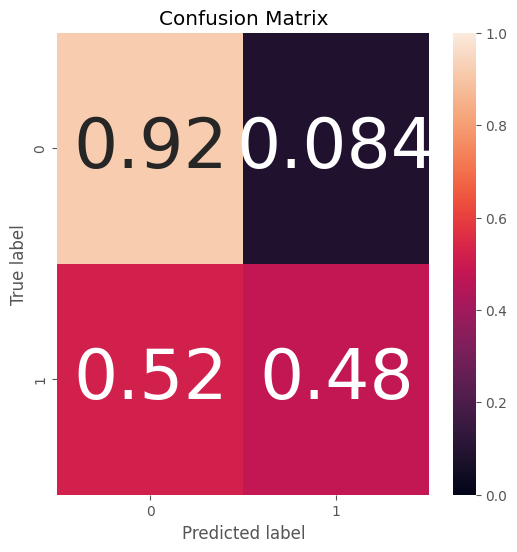

In [97]:
# Plotting Confusion Matrix
cm = confusion_matrix(y_test, y_pred_rfc2)
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
plot_confusion_matrix(cm_norm, classes=final_rfc.classes_)

In [98]:
rfc_tuning_accuracy = accuracy_score(y_test, y_pred_rfc2)
rfc_tuning_precision = precision_score(y_test, y_pred_rfc2)
rfc_tuning_recall = recall_score(y_test, y_pred_rfc2)
rfc_tuning_f1 = f1_score(y_test, y_pred_rfc2)

check_model(models[2], acc[2], prec[2], rec[2], f1[2],
           rfc_tuning_accuracy, rfc_tuning_precision, rfc_tuning_recall, rfc_tuning_f1)

***** Random Forest Model ******

Before Hyperparameter Tuning
Accuracy: 0.8026969481902059
Precision: 0.6643598615916955
Recall: 0.514745308310992
F1 Score: 0.5800604229607251

After Hyperparameter Tuning
Accuracy: 0.8005677785663591
Precision: 0.6729323308270677
Recall: 0.47989276139410186
F1 Score: 0.5602503912363067



- There are **no improvements** in the Random Forest model after the hyperparameter tuning.

### 11.4. XG Boost

In [99]:
xgb_param_grid = {
    "colsample_bytree": [0.3, 0.4, 0.5, 0.7, 0.8],
    "gamma": [0.0, 0.1, 0.2, 0.3, 0.4, 0.5],
    'learning_rate': [0.01, 0.05, 0.1, 0.15, 0.2, 0.3],
    "max_depth": range(1,12), 
    "n_estimators": [100, 200, 300, 400, 500], 
    "min_child_weight": range(1, 7),
    'subsample': [0.2, 0.3, 0.4, 0.5, 0.6, 0.7]
}

tuned_xgb = RandomizedSearchCV(model_xgb, 
                               xgb_param_grid,
                               cv=5,
                               scoring='f1',
                               verbose=3)

tuned_xgb.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.15, max_depth=6, min_child_weight=6, n_estimators=400, subsample=0.5;, score=0.587 total time=   0.3s
[CV 2/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.15, max_depth=6, min_child_weight=6, n_estimators=400, subsample=0.5;, score=0.552 total time=   0.3s
[CV 3/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.15, max_depth=6, min_child_weight=6, n_estimators=400, subsample=0.5;, score=0.540 total time=   0.3s
[CV 4/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.15, max_depth=6, min_child_weight=6, n_estimators=400, subsample=0.5;, score=0.562 total time=   0.3s
[CV 5/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.15, max_depth=6, min_child_weight=6, n_estimators=400, subsample=0.5;, score=0.483 total time=   0.3s
[CV 1/5] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=2, min_child_weight=6, n_estimators=400, sub

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=True,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=...
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=42, ...),
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5, 0.7,
                                                             0.8],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.15,
                                                          0.2, 0.3],
                                        'max_depth': range(1, 12),
                                        'min_child_weight': range(1, 7),
                                        'n_estimators': [100, 200, 300, 400,
                                                         500],
                                        'subsample': [0.2, 0.3, 0.4, 0.5, 0.6,
                                                      0.7]},
                   scoring='f1', verbose=3)

In [100]:
tuned_xgb.best_params_

{'subsample': 0.4,
 'n_estimators': 200,
 'min_child_weight': 1,
 'max_depth': 1,
 'learning_rate': 0.3,
 'gamma': 0.5,
 'colsample_bytree': 0.3}

In [101]:
# getting the model with the best parameters
tuned_xgb.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.3, device=None, early_stopping_rounds=None,
              enable_categorical=True, eval_metric=None, feature_types=None,
              gamma=0.5, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=1, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [103]:
# Final Random Forest model
final_xgb = XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.3, device=None, early_stopping_rounds=None,
              enable_categorical=True, eval_metric=None, feature_types=None,
              gamma=0.5, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=1, max_leaves=None,
              min_child_weight=1, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=42)
final_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.3, device=None, early_stopping_rounds=None,
              enable_categorical=True, eval_metric=None, feature_types=None,
              gamma=0.5, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=1, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [104]:
# use testing data to predict
y_pred_xgb2 = final_xgb.predict(X_test)
y_pred_xgb2

array([1, 0, 0, ..., 0, 0, 1])

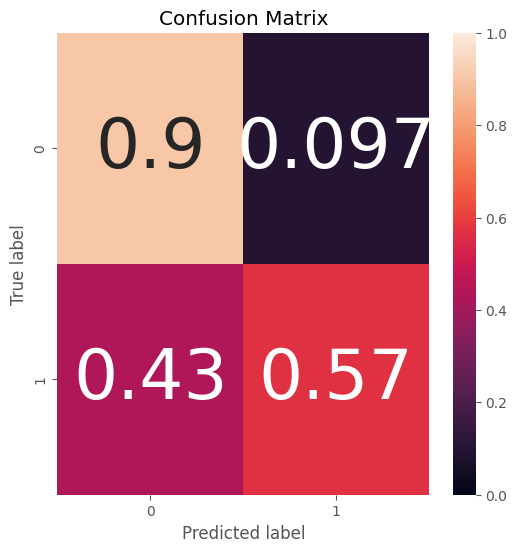

In [105]:
# Plotting Confusion Matrix
cm = confusion_matrix(y_test, y_pred_xgb2)
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
plot_confusion_matrix(cm_norm, classes=final_xgb.classes_)

In [106]:
xgb_tuning_accuracy = accuracy_score(y_test, y_pred_xgb2)
xgb_tuning_precision = precision_score(y_test, y_pred_xgb2)
xgb_tuning_recall = recall_score(y_test, y_pred_xgb2)
xgb_tuning_f1 = f1_score(y_test, y_pred_xgb2)

check_model(models[3], acc[3], prec[3], rec[3], f1[3],
           xgb_tuning_accuracy, xgb_tuning_precision, xgb_tuning_recall, xgb_tuning_f1)

***** XG Boost Model ******

Before Hyperparameter Tuning
Accuracy: 0.7877927608232789
Precision: 0.6217105263157895
Recall: 0.5067024128686327
F1 Score: 0.5583456425406205

After Hyperparameter Tuning
Accuracy: 0.8147622427253371
Precision: 0.6794871794871795
Recall: 0.5683646112600537
F1 Score: 0.618978102189781



- There is a **good improvement** in the XG Boost model after the hyperparameter tuning.

## 12. Model Comparison

In [107]:
# plot accuracy, recall, precision and f1 comoarisons
accuracy = [log_tuning_accuracy, knn_tuning_accuracy, rfc_tuning_accuracy, xgb_tuning_accuracy]
recall = [log_tuning_recall, knn_tuning_recall, rfc_tuning_recall, xgb_tuning_recall]
precision = [log_tuning_precision, knn_tuning_precision, rfc_tuning_precision, xgb_tuning_precision]
f1 = [log_tuning_f1, knn_tuning_f1, rfc_tuning_f1, xgb_tuning_f1]

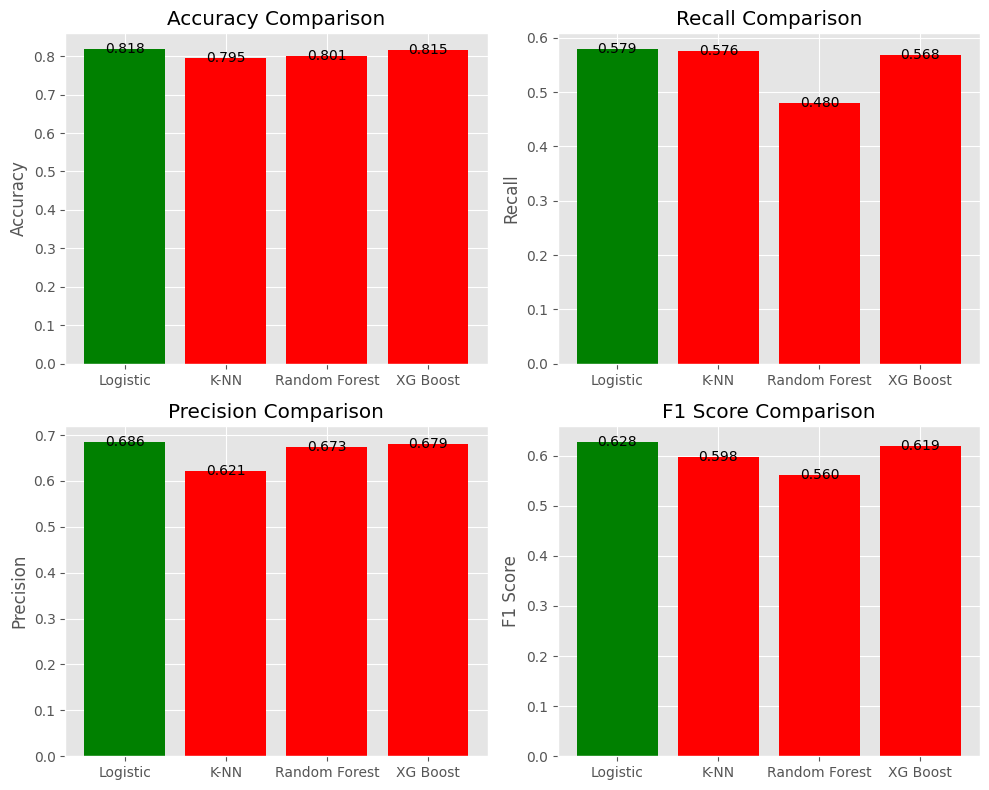

In [108]:
plt.figure(figsize=(10, 8))
# subplot for accuracy, recall, precision, f1
plt.subplot(2, 2, 1)
highlights = ['red' if (x < max(accuracy)) else 'green' for x in accuracy]
bars = plt.bar(models, accuracy, color=highlights)
plt.title('Accuracy Comparison')
plt.ylabel('Accuracy')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.3f}', ha='center', va='center')

plt.subplot(2, 2, 2)
highlights = ['red' if (x < max(recall)) else 'green' for x in recall]
bars = plt.bar(models, recall, color=highlights)
plt.title('Recall Comparison')
plt.ylabel('Recall')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.3f}', ha='center', va='center')

plt.subplot(2, 2, 3)
highlights = ['red' if (x < max(precision)) else 'green' for x in precision]
bars = plt.bar(models, precision, color=highlights)
plt.title('Precision Comparison')
plt.ylabel('Precision')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.3f}', ha='center', va='center')

plt.subplot(2, 2, 4)
highlights = ['red' if (x < max(f1)) else 'green' for x in f1]
bars = plt.bar(models, f1, color=highlights)
plt.title('F1 Score Comparison')
plt.ylabel('F1 Score')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.3f}', ha='center', va='center')

plt.tight_layout()
plt.show()

- **Accuracy:** Logistic Regression has the highest accuracy (0.818) and KNN has the lowest accuracy (0.795)
- **Recall:**  Logistic Regression has the highest recall (0.579) and Random Forest has the lowest recall (0.48)
- **Precision:** Logistic Regression has the highest precision (0.686) and KNN has the lowest precision (0.621)
- **F1 Score:** Logistic Regression has the highest F1 score (0.628) and Random Forest has the lowest F1 score (0.56)

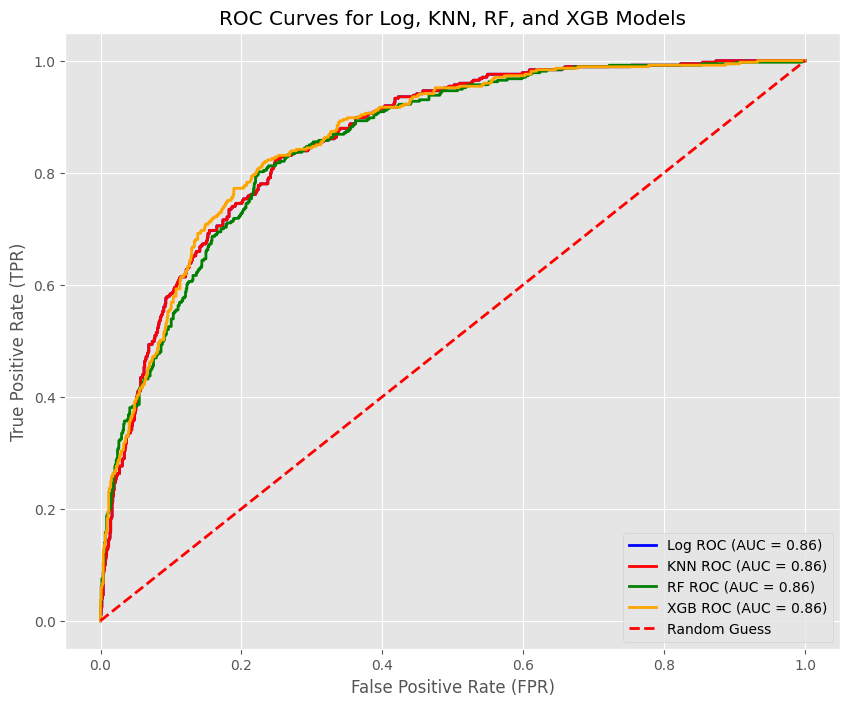

In [109]:
# logistic regression (Log ROC)
y_prob_log = tuned_log.predict_proba(X_test)[:, 1]
fpr_log, tpr_log, _ = roc_curve(y_test, y_prob_log)
roc_auc_log = auc(fpr_log, tpr_log)

# knn (knn ROC)
y_prob_knn = tuned_knn.predict_proba(X_test)[:, 1]
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_prob_log)
roc_auc_knn = auc(fpr_knn, tpr_knn)

# rf(RF ROC)
y_prob_rfc = tuned_rfc.predict_proba(X_test)[:, 1]
fpr_rfc, tpr_rfc, _ = roc_curve(y_test, y_prob_rfc)
roc_auc_rfc = auc(fpr_rfc, tpr_rfc)

# xgb (XGB ROC)
y_prob_xgb = tuned_xgb.predict_proba(X_test)[:, 1]
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_prob_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

# ROC curves
plt.figure(figsize=(10, 8))

plt.plot(fpr_log, tpr_log, color='blue', lw=2, label='Log ROC (AUC = %0.2f)' % roc_auc_log)
plt.plot(fpr_knn, tpr_knn, color='red', lw=2, label='KNN ROC (AUC = %0.2f)' % roc_auc_knn)
plt.plot(fpr_rfc, tpr_rfc, color='green', lw=2, label='RF ROC (AUC = %0.2f)' % roc_auc_rfc)
plt.plot(fpr_xgb, tpr_xgb, color='orange', lw=2, label='XGB ROC (AUC = %0.2f)' % roc_auc_xgb)

plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curves for Log, KNN, RF, and XGB Models')
plt.legend(loc='lower right')
plt.show()

- Based on the ROC-AUC curve, all four models appear to perform well at classifying customer churn prediction. There is little difference between the performance of Logistic Regression, Random Forest, and XG Boost, while KNN may have a slightly lower performance.

**NOTE:** So, the conclusion is the **Logistic model** is the best model for predicting customer churn.

In [110]:
log_R2 = r2_score(y_train, final_log.predict(X_train))
knn_R2 = r2_score(y_train, final_knn.predict(X_train))
rfc_R2 = r2_score(y_train, final_rfc.predict(X_train))
xgb_R2 = r2_score(y_train, final_xgb.predict(X_train))

print('R2 - score for Logistic Regression model is : ', log_R2)
print('R2 - score for KNeighbour Nearest model is : ', knn_R2)
print('R2 - score for Random Forest Classifier model is : ', rfc_R2)
print('R2 - score for XG Boost model is : ', xgb_R2)

R2 - score for Logistic Regression model is :  -0.015684809887749562
R2 - score for KNeighbour Nearest model is :  0.04711290685262193
R2 - score for Random Forest Classifier model is :  0.4157082007634989
R2 - score for XG Boost model is :  0.011618545216759757


<BarContainer object of 4 artists>

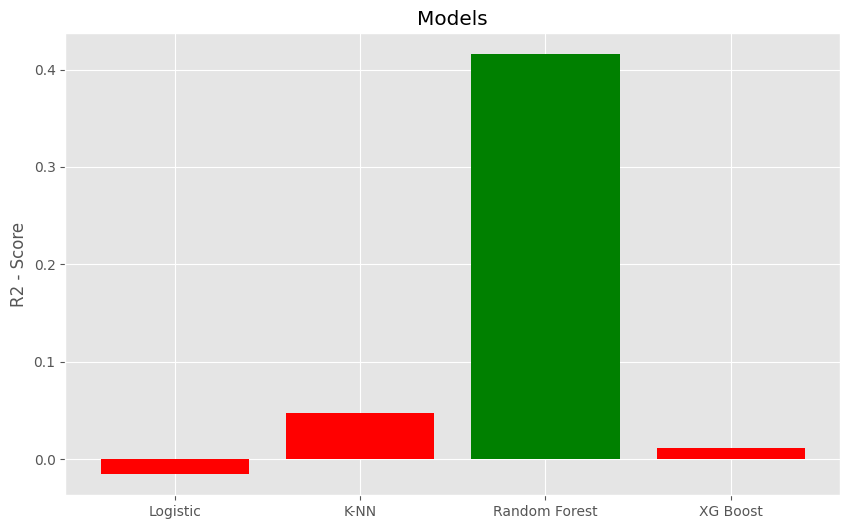

In [111]:
n = [log_R2, knn_R2, rfc_R2, xgb_R2]
y_pos = np.arange(len(models))
highlights = ['red' if (x < max(n)) else 'green' for x in n]

plt.figure(figsize=(10,6))
plt.xticks(y_pos, models)
plt.ylabel('R2 - Score')
plt.title('Models')
plt.bar(y_pos, n, color=highlights)

## 13. New Data Prediction

In [112]:
X_test.iloc[100,]

gender              0.000000
SeniorCitizen       0.000000
Partner             1.000000
Dependents          1.000000
tenure             -0.748080
PhoneService        1.000000
MultipleLines       0.000000
InternetService     1.000000
OnlineSecurity      0.000000
OnlineBackup        0.000000
DeviceProtection    0.000000
TechSupport         0.000000
StreamingTV         0.000000
StreamingMovies     0.000000
Contract            0.000000
PaperlessBilling    0.000000
PaymentMethod       2.000000
MonthlyCharges      0.180747
TotalCharges       -0.544082
Total_Services      2.000000
Name: 1042, dtype: float64

In [113]:
y[1]

0

In [114]:
# do some testing
final_log.predict(pd.DataFrame(columns=X_test.columns, 
                              data=np.array([1, 0, 0, 0, 0.351370, 1, 1, 2, 0, 0, 
                                             0, 0, 0, 0, 0, 1, 
                                             0, -1.313208, -0.566163, -1.297286]).reshape(1,20)))

array([0])

## 14. Save Models

In [115]:
pickle.dump(final_log, open('models/3.1. logistic.pkl', 'wb'))
pickle.dump(final_knn, open('models/3.2. knn.pkl', 'wb'))
pickle.dump(final_rfc, open('models/3.3. rfc.pkl', 'wb'))
pickle.dump(final_xgb, open('models/3.4. xgb.pkl', 'wb'))

## 15. Performing PCA

In [116]:
# Applying PCA
pca = PCA(n_components=4)
xr_train_pca = pca.fit_transform(X_train)
xr_test_pca = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.55149121, 0.13087574, 0.07364673, 0.05189526])

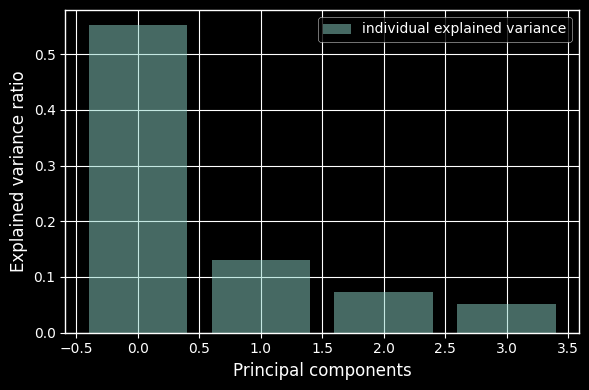

In [117]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(len(explained_variance)), explained_variance, 
            alpha=0.5, align='center',
            label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

In [118]:
# Logistic
pca_log = LogisticRegression(max_iter=2000, 
                             penalty='none')
pca_log.fit(xr_train_pca, y_train)

LogisticRegression(max_iter=2000, penalty='none')

In [119]:
# Knn
pca_knn = KNeighborsClassifier(metric='euclidean', 
                               n_neighbors=11)
pca_knn.fit(xr_train_pca, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=11)

In [120]:
# Random Forest
pca_rfc = RandomForestClassifier(max_depth=20, min_samples_leaf=4, 
                                   min_samples_split=7,
                                   n_estimators=60, random_state=42)
pca_rfc.fit(xr_train_pca, y_train)

RandomForestClassifier(max_depth=20, min_samples_leaf=4, min_samples_split=7,
                       n_estimators=60, random_state=42)

In [121]:
# XG Boost
pca_xgb = XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.3, device=None, early_stopping_rounds=None,
              enable_categorical=True, eval_metric=None, feature_types=None,
              gamma=0.5, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=1, max_leaves=None,
              min_child_weight=1, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=42)
pca_xgb.fit(xr_train_pca, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.3, device=None, early_stopping_rounds=None,
              enable_categorical=True, eval_metric=None, feature_types=None,
              gamma=0.5, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=1, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [122]:
mls = [pca_log, pca_knn, pca_rfc, pca_xgb]

def check_after_pca(model, test_acc, model_name):
    print('**************** ' + model_name + ' Accuracy ****************')
    
    # Model Accuracy before PCA
    print("Accuracy before PCA: ", test_acc)

    # Model Accuracy after PCA
    print("Accuracy after PCA: ", model.score(xr_test_pca, y_test))
    print('')

In [123]:
for i in range(0,len(models)):
    check_after_pca(mls[i], accuracy[i], models[i])

**************** Logistic Accuracy ****************
Accuracy before PCA:  0.8183108587650816
Accuracy after PCA:  0.8133427963094393

**************** K-NN Accuracy ****************
Accuracy before PCA:  0.794889992902768
Accuracy after PCA:  0.7970191625266146

**************** Random Forest Accuracy ****************
Accuracy before PCA:  0.8005677785663591
Accuracy after PCA:  0.8034066713981547

**************** XG Boost Accuracy ****************
Accuracy before PCA:  0.8147622427253371
Accuracy after PCA:  0.8048261178140526



- The conclusion, there are **not many improvements** in the model accuracy after performing the PCA.

## Actionable Insights
- **Customer segmentation:** Divide customers into groups based on their expected churn rates. Determine which high-risk segments require focused retention measures.
- **Service Analysis:** Determine the impact of various services on churn. Identify services with greater attrition rates and plan targeted promotions or enhancements.
- **Demographic Patterns:** Investigate demographic characteristics that affect turnover. Determine whether certain age groups or genders are more prone to churn and adjust marketing techniques accordingly.